# 1) In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

Machine Learning (ML) is a type of artificial intelligence (AI). Machine learning algorithms are used iteratively on large data sets to extract information or identify relationships without being programmed explicitly to do so. It is useful for drawing causal insights (why we observe certain things in the data), predicting future events, and understanding patterns in the data.

Machine learning models fall into two categories: supervised and unsupervised. Supervised models are defined by a target variable that the model is optimizing. Supervised models are used to diagnose causes of data behavior, make predictions, determine causality, and make inferences. For example, a supervised model can determine the likelihood of being diagnosed with a certain medical condition based on a suite of diagnostic criteria. 

Supervised models are of two types: classification and regression. In classification models, the target variable is categorical or discrete; the model predicts classes or types of outcomes. In regression modes, the target variable is continuous; the model predicts the quantity of outcome.

Unsupervised models are used to explore data for pattern identification. There is no target variables and models are trained on input features. The model “roams” the data space.  It is useful for detecting anomalies in a data set, or for identifying outliers. It can naively classify data. Recommender engines are an example of unsupervised machine learning. 

To utilize machine learning, you start with a question of interest, collect and clean the data set, choose a machine learning algorithm, train the algorithm on a subset of the data, validate the model’s performance on the complementary subset of the data, and then, if the performance is good, apply the model to new data. 

As with all models, the quality of the output depends on the quality of the input. It is essential to train models on an abundance of high quality data points. One is better off having more records of a smaller set of highly informative explanatory variables, and in order to achieve that, there may need to be a few rounds of data collection. 

When to not use ML:

•	You do not have a clear question that would be informed by a ML model test. 

•	You have small, noisy, or “messy” data sets (most ecological data sets are a great example). 

•	If a simpler method would yield the required results.  

•	Your resources limit additional data collection. 


# 2) Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

In [1]:
#Setting dependencies, etc. 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import time
from sklearn import preprocessing


### Creating initial dataframe and inspecting data

In [2]:
df = pd.read_csv('loans_full_schema.csv')
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [4]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


The .info() method tells me there are 10 columns with missing values. There's a mixture of numerical and object datatypes; the latter will have to be numerically encoded. Checking the information from the .describe method, it looks like the variances (std) of the features span several orders of magnitude. Some sort of transformation (lognormal) or other standardization may need to be done. I used .hist() on the dataframe to quickly check the distributions of the numerical features and omitted it as it was too messy. 

### Pre-processing: Inspecting distribution of null values

Let's check on the distribution of null (NaN) values, expressed as a percentage, inspect the context, and make decisions about how to deal with them.

In [5]:
#Percentage of missing values for each column
df.isna().sum()/len(df)*100

emp_title                            8.33
emp_length                           8.17
state                                0.00
homeownership                        0.00
annual_income                        0.00
verified_income                      0.00
debt_to_income                       0.24
annual_income_joint                 85.05
verification_income_joint           85.45
debt_to_income_joint                85.05
delinq_2y                            0.00
months_since_last_delinq            56.58
earliest_credit_line                 0.00
inquiries_last_12m                   0.00
total_credit_lines                   0.00
open_credit_lines                    0.00
total_credit_limit                   0.00
total_credit_utilized                0.00
num_collections_last_12m             0.00
num_historical_failed_to_pay         0.00
months_since_90d_late               77.15
current_accounts_delinq              0.00
total_collection_amount_ever         0.00
current_installment_accounts      

A display is even more helpful to see the distribution of NaNs:

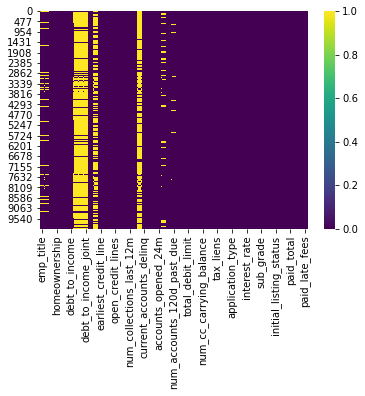

In [6]:
sns.heatmap(df.isnull(), cmap='viridis');

### Pre-processing: dropping features with nulls above a threshold

I am removing all features with null values greater than 10%. That eliminates the three features related to joint income, months_since_last_delinq, and months_since_90d_late, and months_since_last_credit_inquiry. The last three are featured in credit reports but other features may capture similar information.

In [7]:
df = df.dropna(thresh=0.90*len(df), axis = 1)

In [8]:
df.isna().sum()/len(df)*100

emp_title                       8.33
emp_length                      8.17
state                           0.00
homeownership                   0.00
annual_income                   0.00
verified_income                 0.00
debt_to_income                  0.24
delinq_2y                       0.00
earliest_credit_line            0.00
inquiries_last_12m              0.00
total_credit_lines              0.00
open_credit_lines               0.00
total_credit_limit              0.00
total_credit_utilized           0.00
num_collections_last_12m        0.00
num_historical_failed_to_pay    0.00
current_accounts_delinq         0.00
total_collection_amount_ever    0.00
current_installment_accounts    0.00
accounts_opened_24m             0.00
num_satisfactory_accounts       0.00
num_accounts_120d_past_due      3.18
num_accounts_30d_past_due       0.00
num_active_debit_accounts       0.00
total_debit_limit               0.00
num_total_cc_accounts           0.00
num_open_cc_accounts            0.00
n

NB: it is worth noting that, since columns related to joint applications have been dropped, it makes sense to remove all records of joint applications. However, that would have removed 15% of TOTAL RECORDS; I am not
comfortable removing that amount of data. Furthermore, it would have limited any model to behavior of individual 
loan applicants only. (As it now stands, it's probably not a good data set for models including joint applicants).

### Pre-processing: replacing nulls in remaining features

Null values in "emp_title" may occur for privacy reasons. I replace nulls with "NoData".

In [9]:
df['emp_title'] = df['emp_title'].fillna('NoData')
#check
df[df['emp_title'] == 'NoData']

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
5,NoData,NaN,KY,OWN,34000.0,Not Verified,6.46,1,1990,6,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
14,NoData,NaN,FL,MORTGAGE,17000.0,Verified,33.98,1,2006,0,...,D3,Jan-2018,Current,whole,Cash,2744.21,454.36,255.79,198.57,0.0
16,NoData,NaN,NV,MORTGAGE,60000.0,Not Verified,31.22,0,2003,4,...,D3,Jan-2018,Current,whole,Cash,11374.52,1532.08,625.48,906.60,0.0
23,NoData,NaN,TX,MORTGAGE,40280.0,Verified,7.27,0,1997,1,...,A3,Mar-2018,Current,whole,Cash,3323.42,223.71,176.58,47.13,0.0
40,NoData,NaN,MI,MORTGAGE,19000.0,Not Verified,24.79,0,2004,0,...,D2,Jan-2018,Current,whole,Cash,9465.30,1261.32,534.70,726.62,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,NoData,NaN,MO,OWN,45000.0,Source Verified,24.99,2,2001,1,...,B4,Mar-2018,Current,whole,Cash,9525.68,647.78,474.32,173.46,0.0
9932,NoData,NaN,NC,RENT,45000.0,Not Verified,14.93,0,1993,0,...,B1,Mar-2018,Current,whole,Cash,18540.06,1899.07,1459.94,439.13,0.0
9941,NoData,NaN,GA,MORTGAGE,25000.0,Verified,28.42,0,2006,1,...,B2,Feb-2018,Current,whole,Cash,2731.47,388.37,293.53,94.84,0.0
9975,NoData,NaN,MD,MORTGAGE,95000.0,Source Verified,10.66,0,1996,0,...,C3,Mar-2018,Current,whole,Cash,18634.90,2037.09,1365.10,671.99,0.0


"emp_length" is an important feature, as lenders are interested in income stability. Values range from 0 to 10+, where any employment longer than 10 years is given a value of 10. From .describe(), we see the mean and median are almost equal (approx 6). Let's check the mode and the histogram.

In [10]:
df.mode()['emp_length'][0]

10.0

In [11]:
#how many?
df['emp_length'].value_counts()

10.0    3332
2.0      967
3.0      862
0.0      690
1.0      685
5.0      645
4.0      611
6.0      404
7.0      368
9.0      312
8.0      307
Name: emp_length, dtype: int64

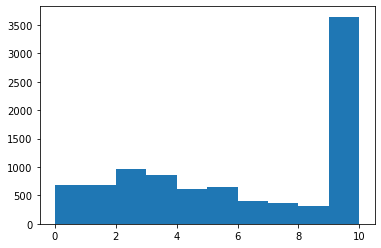

In [12]:
plt.hist(df['emp_length']);

Replacing null values with the mean increases the occurences in the 6 year category threefold and increases its order of magnitude. Replacing nulls with the mode (10) increases the ten year category by a factor of 1.25,  it also shifts the mean and std (compared to the original feature). Replacing nulls with a random selection of values drawn from the column does a pretty good job of preserving the original statistics of this feature. 

In [13]:
df['emp_length'] = df['emp_length'].apply(lambda x: np.random.choice(df['emp_length'].dropna().values) if np.isnan(x) else x)

In [14]:
df['emp_length'].describe()

count    10000.000000
mean         5.925700
std          3.703343
min          0.000000
25%          2.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64

In [15]:
df['emp_length'].value_counts()

10.0    3630
2.0     1057
3.0      944
0.0      755
1.0      737
5.0      709
4.0      667
6.0      442
7.0      399
9.0      336
8.0      324
Name: emp_length, dtype: int64

In [16]:
df.isna().sum()/len(df)*100

emp_title                       0.00
emp_length                      0.00
state                           0.00
homeownership                   0.00
annual_income                   0.00
verified_income                 0.00
debt_to_income                  0.24
delinq_2y                       0.00
earliest_credit_line            0.00
inquiries_last_12m              0.00
total_credit_lines              0.00
open_credit_lines               0.00
total_credit_limit              0.00
total_credit_utilized           0.00
num_collections_last_12m        0.00
num_historical_failed_to_pay    0.00
current_accounts_delinq         0.00
total_collection_amount_ever    0.00
current_installment_accounts    0.00
accounts_opened_24m             0.00
num_satisfactory_accounts       0.00
num_accounts_120d_past_due      3.18
num_accounts_30d_past_due       0.00
num_active_debit_accounts       0.00
total_debit_limit               0.00
num_total_cc_accounts           0.00
num_open_cc_accounts            0.00
n

The debt-to-income ratio (DIR) is an important feature for a model assessing probability of default. 

In [17]:
df['debt_to_income'].value_counts()

0.00     28
16.11    14
13.20    12
20.66    12
19.42    12
         ..
64.51     1
39.10     1
84.68     1
6.92      1
11.67     1
Name: debt_to_income, Length: 3673, dtype: int64

Twenty-eight records (0.24% of this data set) have null values for debt_to_income. I replace them with zeros.

In [18]:
df['debt_to_income']=df['debt_to_income'].fillna(0)

In [19]:
df[df['debt_to_income'].isnull()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees


In [20]:
df.isna().sum()/len(df)*100

emp_title                       0.00
emp_length                      0.00
state                           0.00
homeownership                   0.00
annual_income                   0.00
verified_income                 0.00
debt_to_income                  0.00
delinq_2y                       0.00
earliest_credit_line            0.00
inquiries_last_12m              0.00
total_credit_lines              0.00
open_credit_lines               0.00
total_credit_limit              0.00
total_credit_utilized           0.00
num_collections_last_12m        0.00
num_historical_failed_to_pay    0.00
current_accounts_delinq         0.00
total_collection_amount_ever    0.00
current_installment_accounts    0.00
accounts_opened_24m             0.00
num_satisfactory_accounts       0.00
num_accounts_120d_past_due      3.18
num_accounts_30d_past_due       0.00
num_active_debit_accounts       0.00
total_debit_limit               0.00
num_total_cc_accounts           0.00
num_open_cc_accounts            0.00
n

Usually, the number of accounts 120 days past due is an indication of possible default. Checking the number of distinct values: 

In [21]:
df['num_accounts_120d_past_due'].value_counts()

0.0    9682
Name: num_accounts_120d_past_due, dtype: int64

Dropping this column.

In [22]:
df.drop("num_accounts_120d_past_due" ,axis=1, inplace=True)

### Pre-processing: outliers

Outliers are defined as values exceeding three standard deviations from the mean. They also can be defined as values that exceed 1.5 times the first or third quantiles. It's best to remove them if necessary, however, sometimes data captured in outliers are informative. I am visualizing the distribution of outliers for the entire data set using a heat map. If there are a few features with outliers, I may remove them, based on the feature. However, if there are many, I may rely on a standardization/normalization technique to handle them.

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [24]:
outliers = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

<ipython-input-24-a267becd1377>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
<ipython-input-24-a267becd1377>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))


In [25]:
#Checking values of example feature to verify results are boolean
outliers["annual_income"].dtype

dtype('bool')

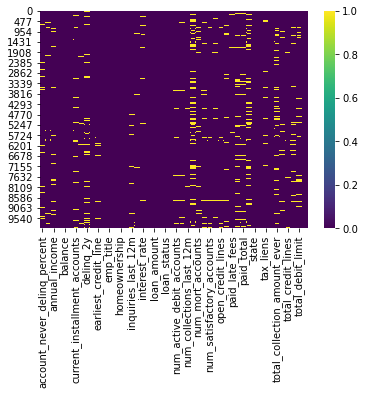

In [26]:
sns.heatmap(outliers, cmap='viridis');

Outliers are distributed throughout. The feature with the MOST outliers is num_historical_failed_to_pay (hard to discern because the features are ordered alphabetically). The next highest number of outliers belongs to the public_record_bankrupt. I don't know how redundant these features are but they may indicate a tendency to default.

I am going to keep all the features, despite the distribution of outliers.

### Pre-processsing: preparing for standardization/normalization and encoding.

I want to get a sense of the shapes of the distributions of the numerical features before I move on to standardization and treating the categorical variables:

I'm going to split the data frame into numerical data types (for standardization) and object data types (for encoding).

In [27]:
df_c = df.select_dtypes('object')
df_c.head()

,emp_title,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,global config engineer,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,warehouse office clerk,HI,RENT,Not Verified,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,assembly,WI,RENT,Source Verified,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,customer service,PA,RENT,Not Verified,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,security supervisor,CA,RENT,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash


In [28]:
df_num = df.drop(df.select_dtypes('object'), axis=1, inplace=False)
df_num.head()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,90000.0,18.01,0,2001,6,28,10,70795,38767,...,0,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,40000.0,5.04,0,1996,1,30,14,28800,4321,...,1,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49,0.0
2,3.0,40000.0,21.15,0,2006,4,31,10,24193,16000,...,0,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43,0.0
3,1.0,30000.0,10.16,0,2007,0,4,4,25400,4997,...,0,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,35000.0,57.96,0,2008,7,22,16,69839,52722,...,0,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80,0.0


#### Looking at the distributions and statistics of numerical features

The variances are all over the place, as are the ranges of values.

Quick plots of features to see shapes of distributions

In [29]:
df_num.columns;

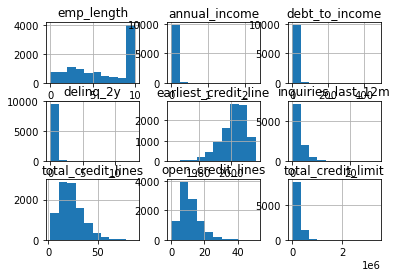

In [30]:
df_num.hist(['emp_length', 'annual_income', 'debt_to_income', 'delinq_2y',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit']);

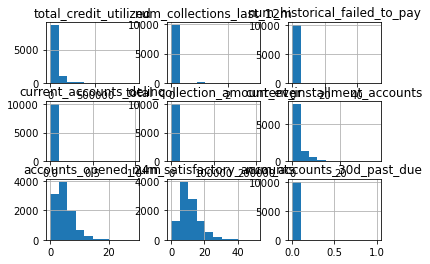

In [31]:
df_num.hist(['total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'num_satisfactory_accounts', 'num_accounts_30d_past_due']);

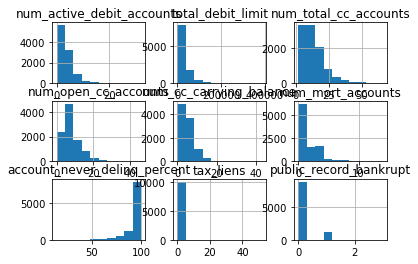

In [32]:
df_num.hist(['num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt']);

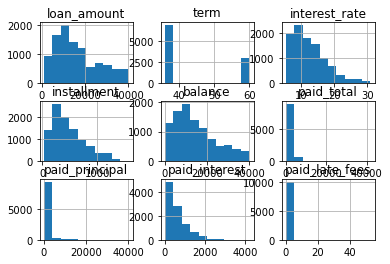

In [33]:
df_num.hist(['loan_amount', 'term', 'interest_rate', 'installment', 'balance',
       'paid_total', 'paid_principal', 'paid_interest', 'paid_late_fees']);

Most of these features are either right-skewed; we can see that there's a huge variation in scale. Some have a small set of distinct values.

### Pre-processing: scaling/normalizing the numerical data

Now, depending on the type of model we use, this may not matter. For example, if we use a logistic regression model, we're not bound by the assumptions of heteroscedasticity, linearity, normality, etc. However, if we use a 
linear model, we will need to standardize or normalize. Each method has its place. Standardization renders all features with the same mean and variance, however, outliers can cause distortions. Nevertheless, for the sake of this exercise, I'll perform the standardization. 

In [34]:
from sklearn.preprocessing import StandardScaler

scale_df = StandardScaler()

scale_df

StandardScaler()

In [35]:
num_scale = scale_df.fit_transform(df_num)
num_scale

array([[-0.7900554 ,  0.16650203, -0.08336879, ..., -0.23436111,
         0.80325045, -0.06590797],
       [ 1.10022309, -0.60592476, -0.94712365, ..., -0.3979747 ,
        -0.86830635, -0.06590797],
       [-0.7900554 , -0.60592476,  0.12574379, ..., -0.4425809 ,
        -0.953479  , -0.06590797],
       ...,
       [ 1.10022309, -0.1888143 ,  1.73138216, ...,  0.12561143,
         3.16794175, -0.06590797],
       [-1.33013497,  0.01201667, -0.48427891, ...,  0.15123567,
        -0.40254378, -0.06590797],
       [-0.7900554 , -0.20426283,  0.10376699, ..., -0.17230736,
        -0.32143065, -0.06590797]])

In [36]:
num_scale.shape

(10000, 36)

In [37]:
df_num_scale = pd.DataFrame(num_scale, columns=['emp_length', 'annual_income', 'debt_to_income', 'delinq_2y',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'num_satisfactory_accounts', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate', 'installment', 'balance',
       'paid_total', 'paid_principal', 'paid_interest', 'paid_late_fees']) 

In [38]:
df_num_scale.head()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,-0.790055,0.166502,-0.083369,-0.315962,-0.037203,1.698227,0.447663,-0.239333,-0.601264,-0.228997,...,-0.367190,1.129752,1.516684,0.328439,0.598041,1.260223,-0.125038,-0.234361,0.803250,-0.065908
1,1.100223,-0.605925,-0.947124,-0.315962,-0.678630,-0.402603,0.615944,0.442332,-0.825091,-0.871239,...,2.598804,-1.102945,-0.659333,0.036489,-1.046902,-0.984292,-0.504067,-0.397975,-0.868306,-0.065908
2,-0.790055,-0.605925,0.125744,-0.315962,0.604224,0.857895,0.700085,-0.239333,-0.849645,-0.653485,...,-0.367190,-1.394166,-0.659333,0.932336,-1.372981,-1.267985,-0.558973,-0.442581,-0.953479,-0.065908
3,-1.330135,-0.760410,-0.606150,-0.315962,0.732510,-0.822769,-1.571716,-1.261830,-0.843212,-0.858635,...,-0.367190,0.508480,-0.659333,-1.141310,0.637589,0.441019,0.206834,0.219425,-0.064791,-0.065908
4,1.100223,-0.683167,2.577156,-0.315962,0.860795,2.118393,-0.057182,0.783165,-0.606360,0.031192,...,-0.367190,0.644383,-0.659333,0.328439,1.053683,0.699638,-0.042846,-0.083569,0.299889,-0.065908


Now this part of the data set is ready to include in the data set for modeling.

#### Encoding categorical variables

In [39]:
df_c.head()

,emp_title,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,global config engineer,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,warehouse office clerk,HI,RENT,Not Verified,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,assembly,WI,RENT,Source Verified,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,customer service,PA,RENT,Not Verified,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,security supervisor,CA,RENT,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash


grade and sub_grade are categorical but ordinal variables, so we can map values.

In [40]:
df_c['grade'].unique()

array(['C', 'D', 'A', 'B', 'F', 'E', 'G'], dtype=object)

In [41]:
rank_g = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}

NB: I think I'm running into some "chained indexing" issues here, but don't have time to fix.

In [42]:
df_c['grade'] = df_c['grade'].map(rank_g)

<ipython-input-42-2f210c9e28cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['grade'] = df_c['grade'].map(rank_g)


In [43]:
df_c['grade'].unique();

In [44]:
df_c['grade'].head(20);

In [45]:
df_c['sub_grade'].unique()

array(['C3', 'C1', 'D1', 'A3', 'C2', 'B5', 'C4', 'B2', 'B1', 'D3', 'F1',
       'E5', 'A2', 'A5', 'A4', 'A1', 'D4', 'D5', 'B3', 'D2', 'E1', 'G1',
       'B4', 'C5', 'E2', 'E4', 'F3', 'E3', 'F5', 'F2', 'F4', 'G4'],
      dtype=object)

In [46]:
df_c['sub_grade'].value_counts();

In [47]:
rank_sub= {'A1':1,'A2':2,'A3':3,'A4':4,'A5':5,'B1':6,'B2':7,'B3':8,'B4':9,'B5':10,
           'C1':11,'C2':12, 'C3':13,'C4':14,'C5':15, 'D1':16, 'D2':17,'D3':18,'D4':19,'D5':20,
          'E1':21,'E2':22,'E3':23,'E4':24,'E5':25,'F1':26,'F2':27,'F3':28,'F4':29,'F5':30, 'G1':31, 'G2':32}
df_c['sub_grade'] = df_c['sub_grade'].map(rank_sub)

<ipython-input-47-db96c175714a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['sub_grade'] = df_c['sub_grade'].map(rank_sub)


In [48]:
df_c['sub_grade'].head(20);

In [49]:
df_c['issue_month'].value_counts()

Mar-2018    3617
Jan-2018    3395
Feb-2018    2988
Name: issue_month, dtype: int64

### Pre-processing: encoding remaining categorical variables

The choice is to use LabelEncoder or one-hot encoding for remaining categorical features. LabelEncoder assigns a sequence of numbers to the distinct values of a feature. As such, artificial relationships among values can be created. To avoid this, I will use one-hot encoding for the remaining features.

In [50]:
df_c = pd.get_dummies(df_c[['emp_title', 'state','issue_month','homeownership', 'verified_income', 'loan_purpose','application_type', 'loan_status', 'initial_listing_status', 'disbursement_method']])

In [51]:
df_c.head();

Now, merge the two dataframes. 

In [52]:
loans_df = pd.concat([df_num,df_c],axis=1)

In [53]:
loans_df.head()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),initial_listing_status_fractional,initial_listing_status_whole,disbursement_method_Cash,disbursement_method_DirectPay
0,3.0,90000.0,18.01,0,2001,6,28,10,70795,38767,...,0,1,0,0,0,0,0,1,1,0
1,10.0,40000.0,5.04,0,1996,1,30,14,28800,4321,...,0,1,0,0,0,0,0,1,1,0
2,3.0,40000.0,21.15,0,2006,4,31,10,24193,16000,...,0,1,0,0,0,0,1,0,1,0
3,1.0,30000.0,10.16,0,2007,0,4,4,25400,4997,...,0,1,0,0,0,0,0,1,1,0
4,10.0,35000.0,57.96,0,2008,7,22,16,69839,52722,...,0,1,0,0,0,0,0,1,1,0


# 3) Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

In [54]:
df.corr()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.090227,0.023511,0.004522,-0.203351,0.003766,0.127260,0.067034,0.138239,0.020268,...,0.028352,0.087839,0.052893,-0.027433,0.074127,0.082539,0.026940,0.021050,0.048045,0.005935
annual_income,0.090227,1.000000,-0.175986,0.052236,-0.156001,0.090119,0.210163,0.176788,0.516703,0.406370,...,-0.030568,0.324665,0.044843,-0.099584,0.315693,0.280170,0.162005,0.141893,0.174154,-0.005318
debt_to_income,0.023511,-0.175986,1.000000,-0.027411,-0.090660,0.025039,0.199884,0.217677,0.075951,0.238662,...,0.006912,0.055600,0.046419,0.139813,0.065339,0.065166,-0.003842,-0.019960,0.120510,-0.009886
delinq_2y,0.004522,0.052236,-0.027411,1.000000,-0.078109,0.003152,0.068040,0.013050,0.053373,0.001855,...,-0.044865,-0.033258,-0.025936,0.090456,-0.013724,-0.031440,-0.004490,-0.006857,0.017165,-0.009404
earliest_credit_line,-0.203351,-0.156001,-0.090660,-0.078109,1.000000,0.042745,-0.294621,-0.174322,-0.231230,-0.140936,...,-0.040181,-0.117749,-0.032736,0.103635,-0.100001,-0.107508,-0.040281,-0.036125,-0.037027,0.020522
inquiries_last_12m,0.003766,0.090119,0.025039,0.003152,0.042745,1.000000,0.210433,0.186462,0.128325,0.120593,...,0.081222,0.034653,0.030506,0.131193,0.043704,0.026550,0.032823,0.023155,0.077204,0.022404
total_credit_lines,0.127260,0.210163,0.199884,0.068040,-0.294621,0.210433,1.000000,0.756209,0.385948,0.458980,...,-0.002579,0.179275,0.091341,-0.044435,0.157548,0.158414,0.082315,0.068932,0.112342,-0.030621
open_credit_lines,0.067034,0.176788,0.217677,0.013050,-0.174322,0.186462,0.756209,1.000000,0.326560,0.406047,...,0.009116,0.154583,0.068368,-0.012773,0.143714,0.145993,0.049598,0.035624,0.112090,-0.025176
total_credit_limit,0.138239,0.516703,0.075951,0.053373,-0.231230,0.128325,0.385948,0.326560,1.000000,0.520876,...,-0.078146,0.303254,0.109235,-0.130497,0.264998,0.262783,0.143306,0.128016,0.135300,-0.014093
total_credit_utilized,0.020268,0.406370,0.238662,0.001855,-0.140936,0.120593,0.458980,0.406047,0.520876,1.000000,...,-0.058941,0.236893,0.085597,0.031527,0.228762,0.213776,0.101605,0.079426,0.181088,-0.016139


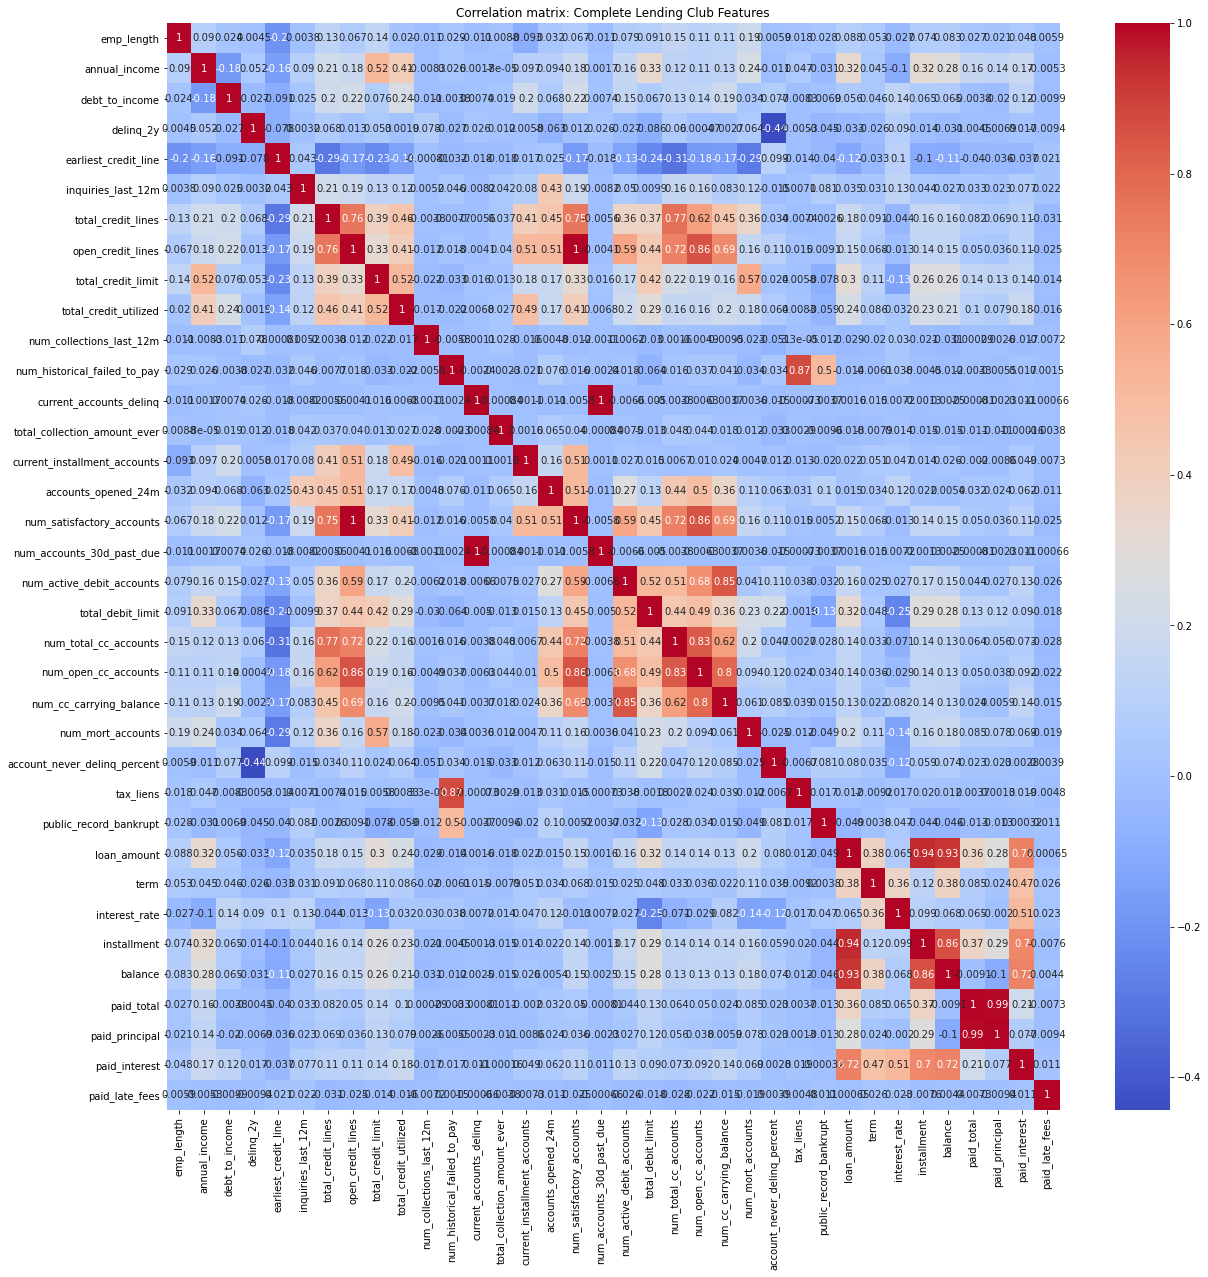

In [55]:
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") 
plt.title('Correlation matrix: Complete Lending Club Features')
plt.show()

### A few simple observations: 

1)There are regions of features that are highly (positively) correlated. These features need to be pared down to reduce redundancy, which will reduce noise in the data set. It will also reduce the tendency for overfitting. One can write code to filter/drop those based on a threshold (e.g. 0.75) but with a smaller data set such as this it might be better to make selections based on knowledge of the features. Most of these regions of high correlation are features related to credit scores, or amounts paid on the current loan;

2) The features with the LEAST intense hues are the least correlated and would probably be the best set to draw from to make a smaller data set comprising the most informative features. Again, features could be filtered based on a threshold;

3) There are no highly negatively correlated features.

#### Below, I further explore/remove the highly correlated features.

In [56]:
df_hi=df[['total_credit_lines','open_credit_lines','num_historical_failed_to_pay','num_satisfactory_accounts',
          'num_accounts_30d_past_due','num_active_debit_accounts','num_total_cc_accounts','num_open_cc_accounts',
         'num_cc_carrying_balance','tax_liens','loan_amount','installment','balance','paid_total','paid_principal',
         'paid_interest']]
df_hi.head();

In [57]:
df_hi.corr();

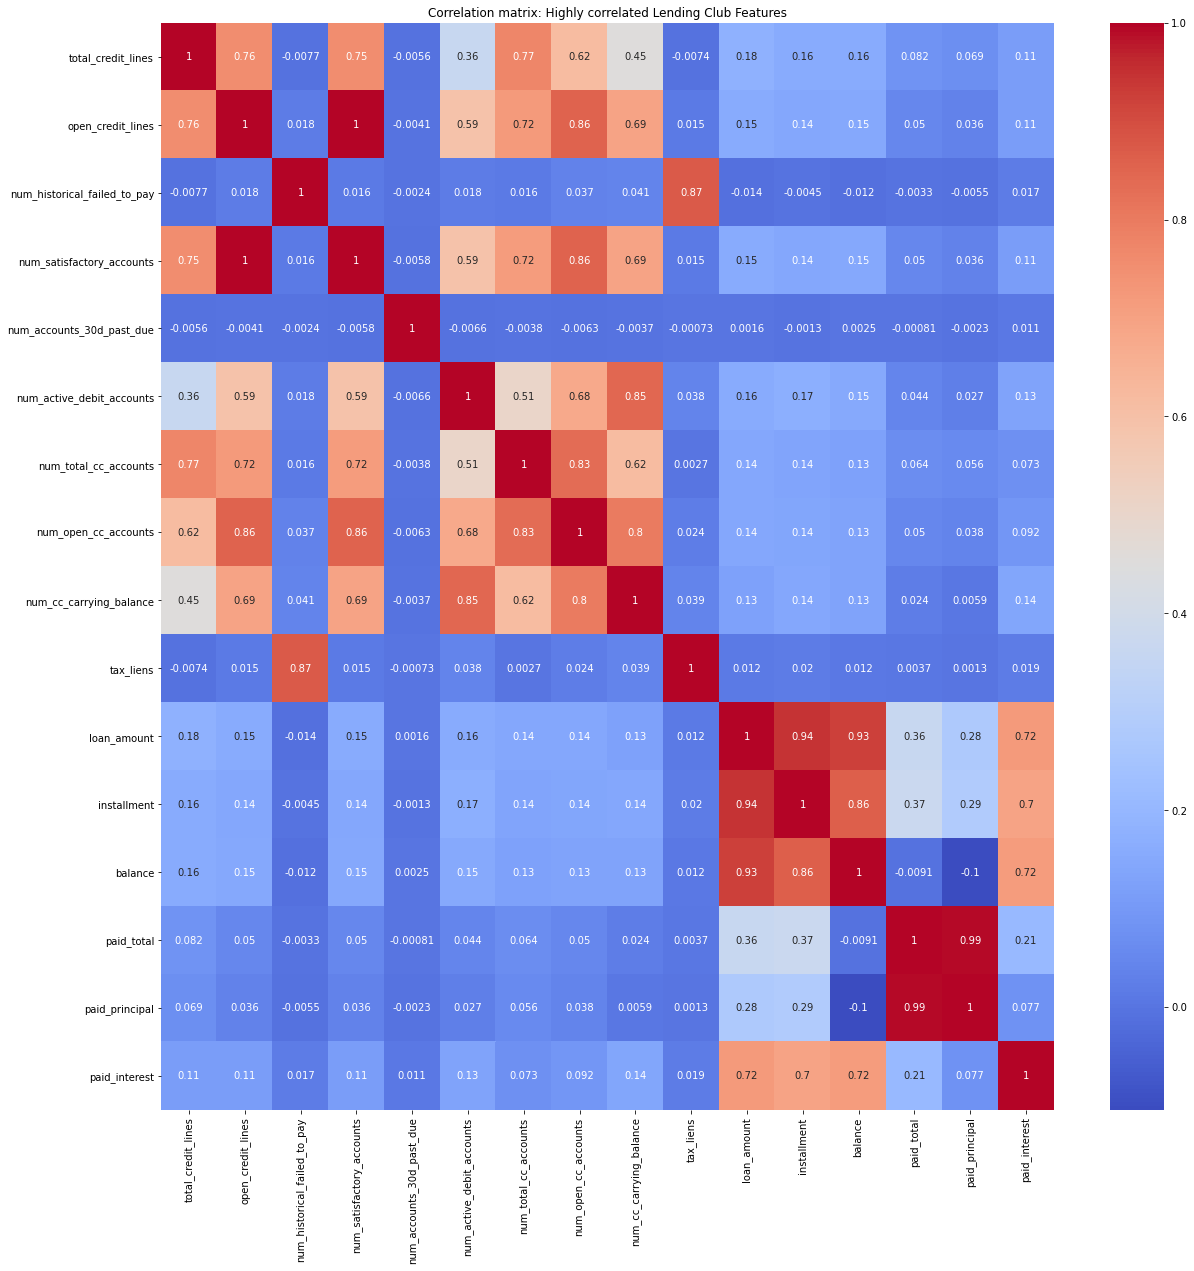

In [58]:
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(df_hi.corr(), annot=True, cmap="coolwarm") 
plt.title('Correlation matrix: Highly correlated Lending Club Features')
plt.show()

Based on the above, it's worth dropping these features from the set: num_historical_failed_to_pay (this one had lots of outliers),open_credit_lines, num_satisfactory_accounts, num_accounts_30d_past_due, num_total_cc_accounts, num_open_cc_accounts, num_cc_carrying_balance, installment, balance, paid_total.

In [59]:
drop_set = ['num_historical_failed_to_pay','open_credit_lines','num_accounts_30d_past_due', 'num_satisfactory_accounts',  'num_total_cc_accounts', 'num_open_cc_accounts', 'num_cc_carrying_balance', 'installment', 'balance', 'paid_total']

In [60]:
df_corr = df.drop(drop_set, axis=1, inplace=False)
df_corr;

In [61]:
df_corr.corr();

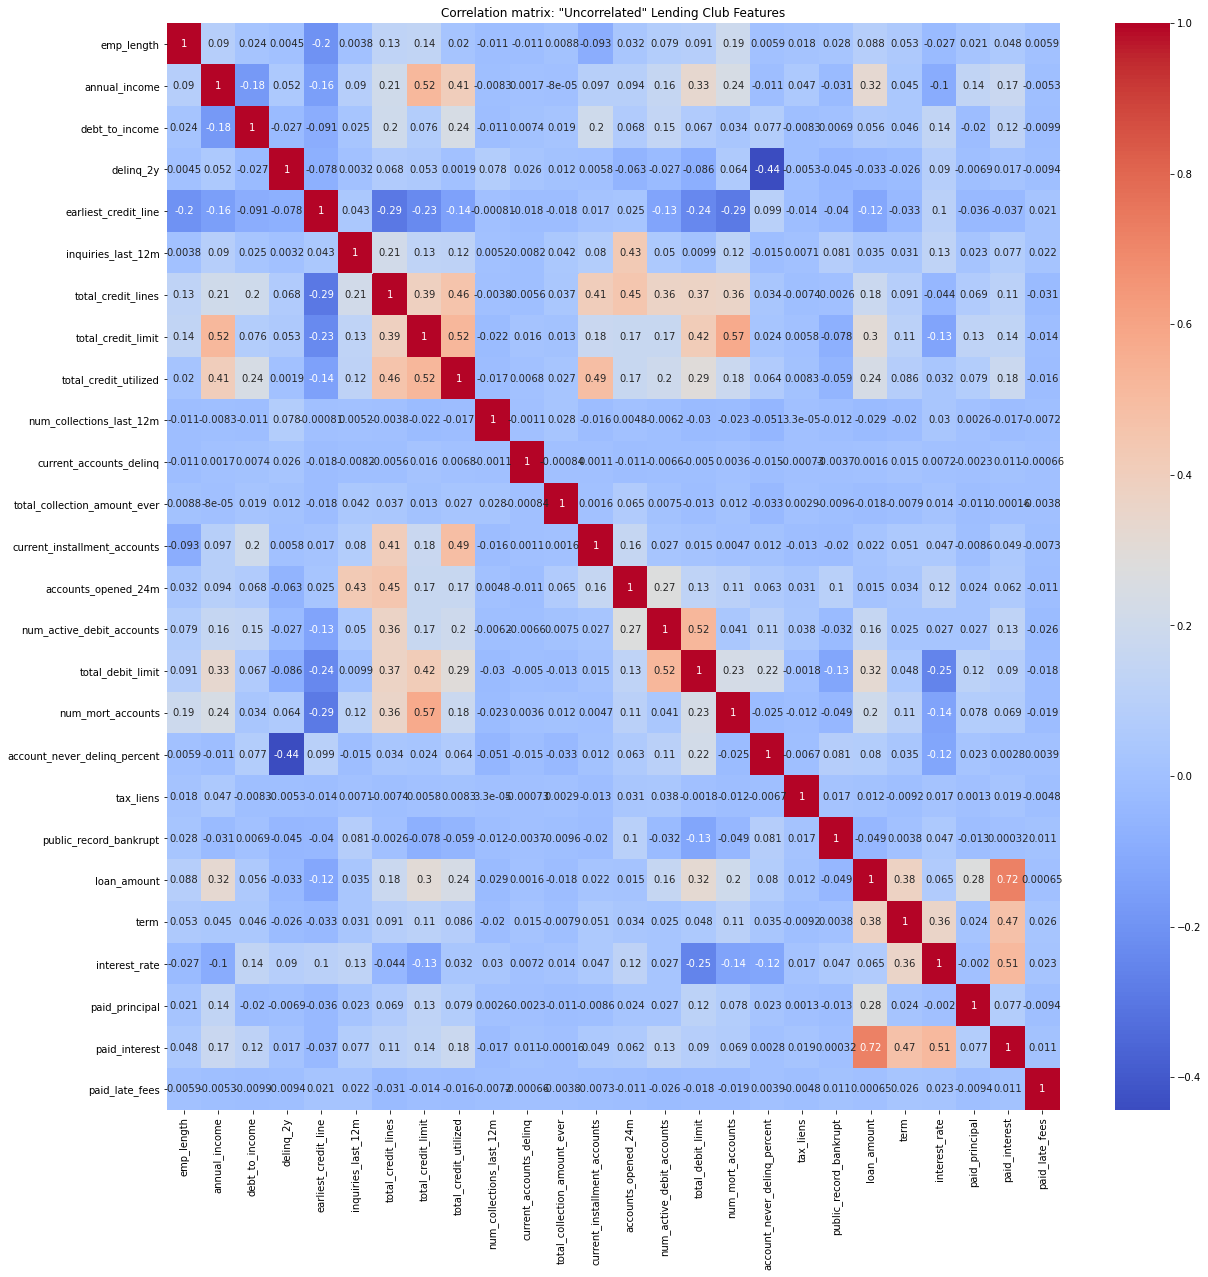

In [62]:
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm") 
plt.title('Correlation matrix: "Uncorrelated" Lending Club Features')
plt.show()

# 4) Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

Choosing bin sizes: there are 10000 data points in this column. There are several methods for bin size selection, from the simple (Juran's Quality Control Handbook) to the complex (Doane's rule, Rice's rule, Sturge's rule). They all have different requirements. I initially settled on taking the square root of the number of values and dividing the range by that number. The result was 390 bins (too many).  I reduced it to 39 first.

In [63]:
np.sqrt(10000)

100.0

In [64]:
range = df['loan_amount'].max() - df['loan_amount'].min()
range

39000

In [65]:
bin_num = range/100
bin_num

390.0

That seems to be too many bins. Increasing the step size to 1000 gives 39 bins. 

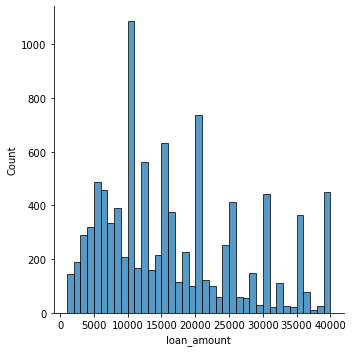

In [66]:
data = df['loan_amount']
data;
sns.displot(data, bins = 39)
plt.show()

This looks too "noisy".  However, we see that:

1) The most abundant loan is 10,000

2) The next most frequent loans (in decreasing order): 20K, 15K, 30K, and 40K. (These amounts are all in 5K increments)

3) The bulk of the loans are for values under 20K. 

It looks like there are two distributions overlaid - one of loans in amounts divisible by 5K, and one of all other loan amounts. They have roughly the same shape and skew; the center of mass of the first distribution seems to be shifted slightly to the right of the second distribution. (This is evident even with 12 bins).

# 5) Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function.

In [67]:
#Defining regions by making lists of states

Pacific=['WA','OR','ID','CA','NV','AZ' ,'UT']
Plains=['MT','WY','CO','KS','NN','TX', 'OK', 'NE','ND','SD']
Midwest=['MN','IA','MO','KY','IL', 'IN','MI', 'OH','WI']
Northeast=['WA','VA','PA','DE','MD','NJ','RI','CT','MA','NY','NH','VT','ME']
South=['AR','LA','MS','TN','AL','GA','FL','SC','NC']

In [68]:
#function uses lambda to create regions from lists of states
state_to_reg=(lambda x: "Pacific" if x in Pacific else ("Plains" if x in Plains else ("Midwest" if x in Midwest
                else ( "Northeast" if x in Northeast else "South" if x in South else "Northeast"))))

In [69]:
df['regions']=df['state'].apply(state_to_reg)

# a. Is there a better way to do this than with a lambda? 

In [70]:
#skipping until later

# b. Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown.

In [71]:
#skipping until later

# 6) Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

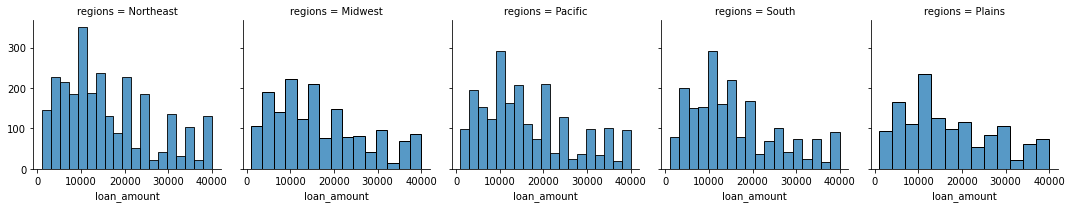

In [72]:
regions_hist =sns.FacetGrid(df,col='regions')
regions_hist.map(sns.histplot,"loan_amount")

Overall, the shapes of the distributions across all regions are abouth the same - right skewed, most abundant loan is 10,000, and majority of loan amounts are 20K or under. 

The greatest number of loans, is in the Northeast, with the Pacific ranking second. Midwest and Plains have fewer high-value loans. Plains has the fewest loans overall (due to low population density?). 

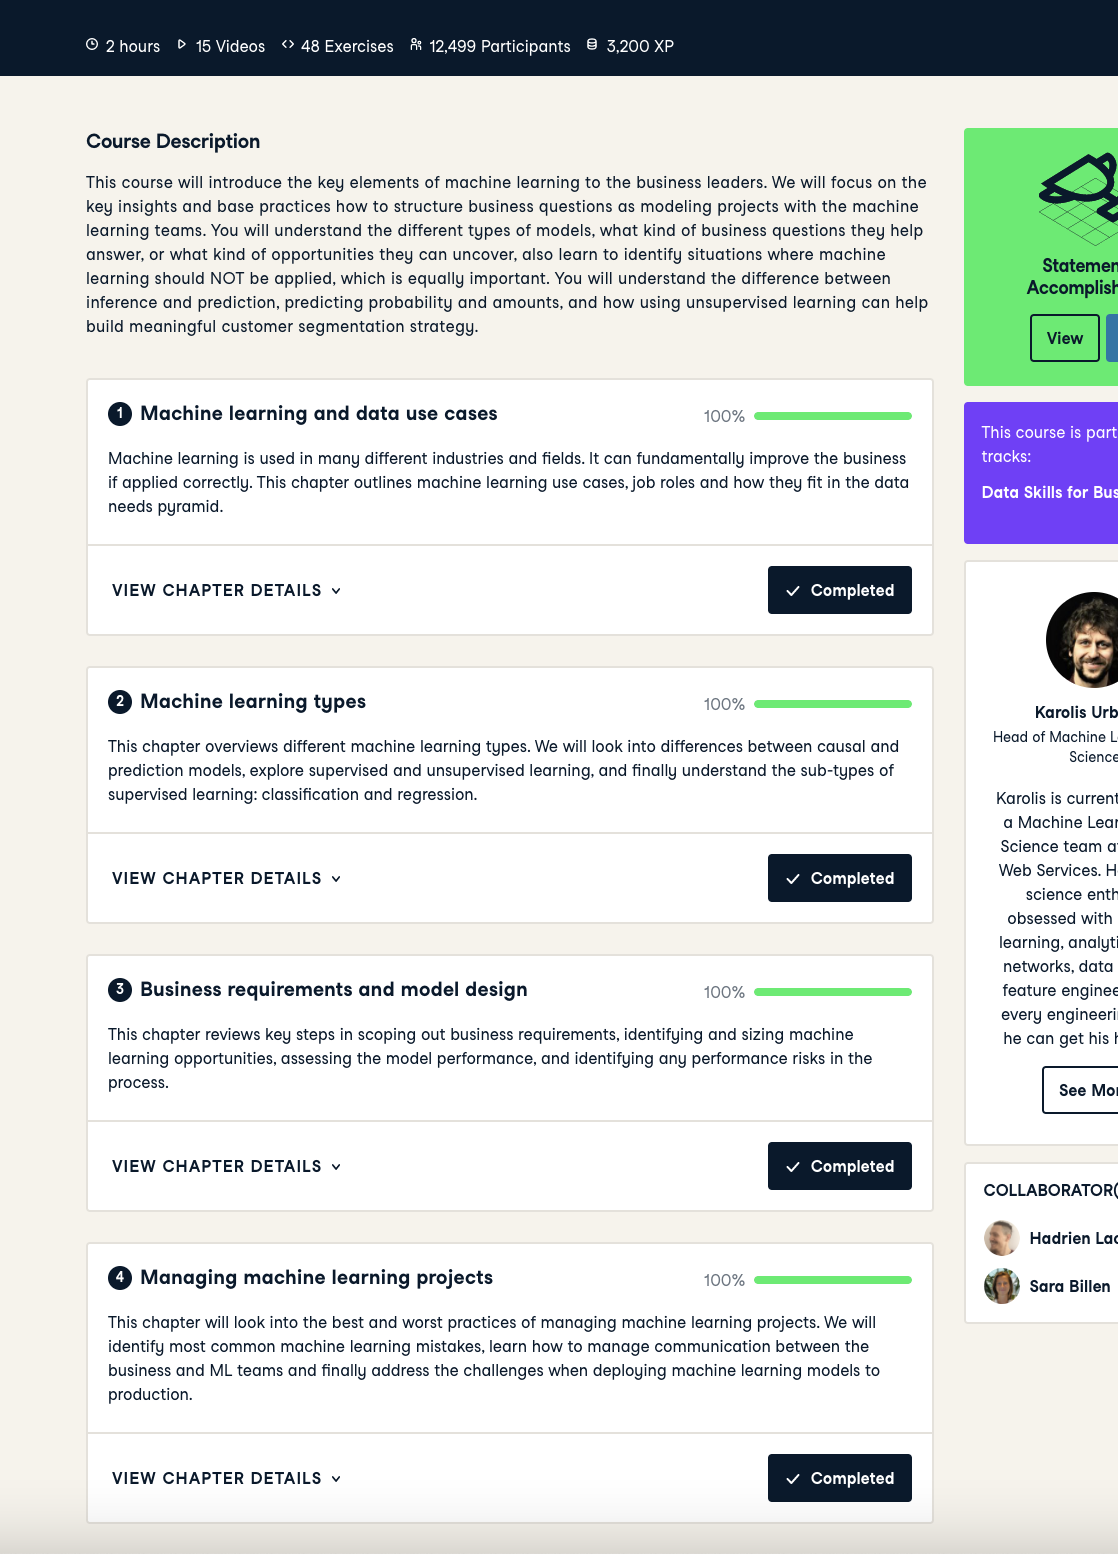

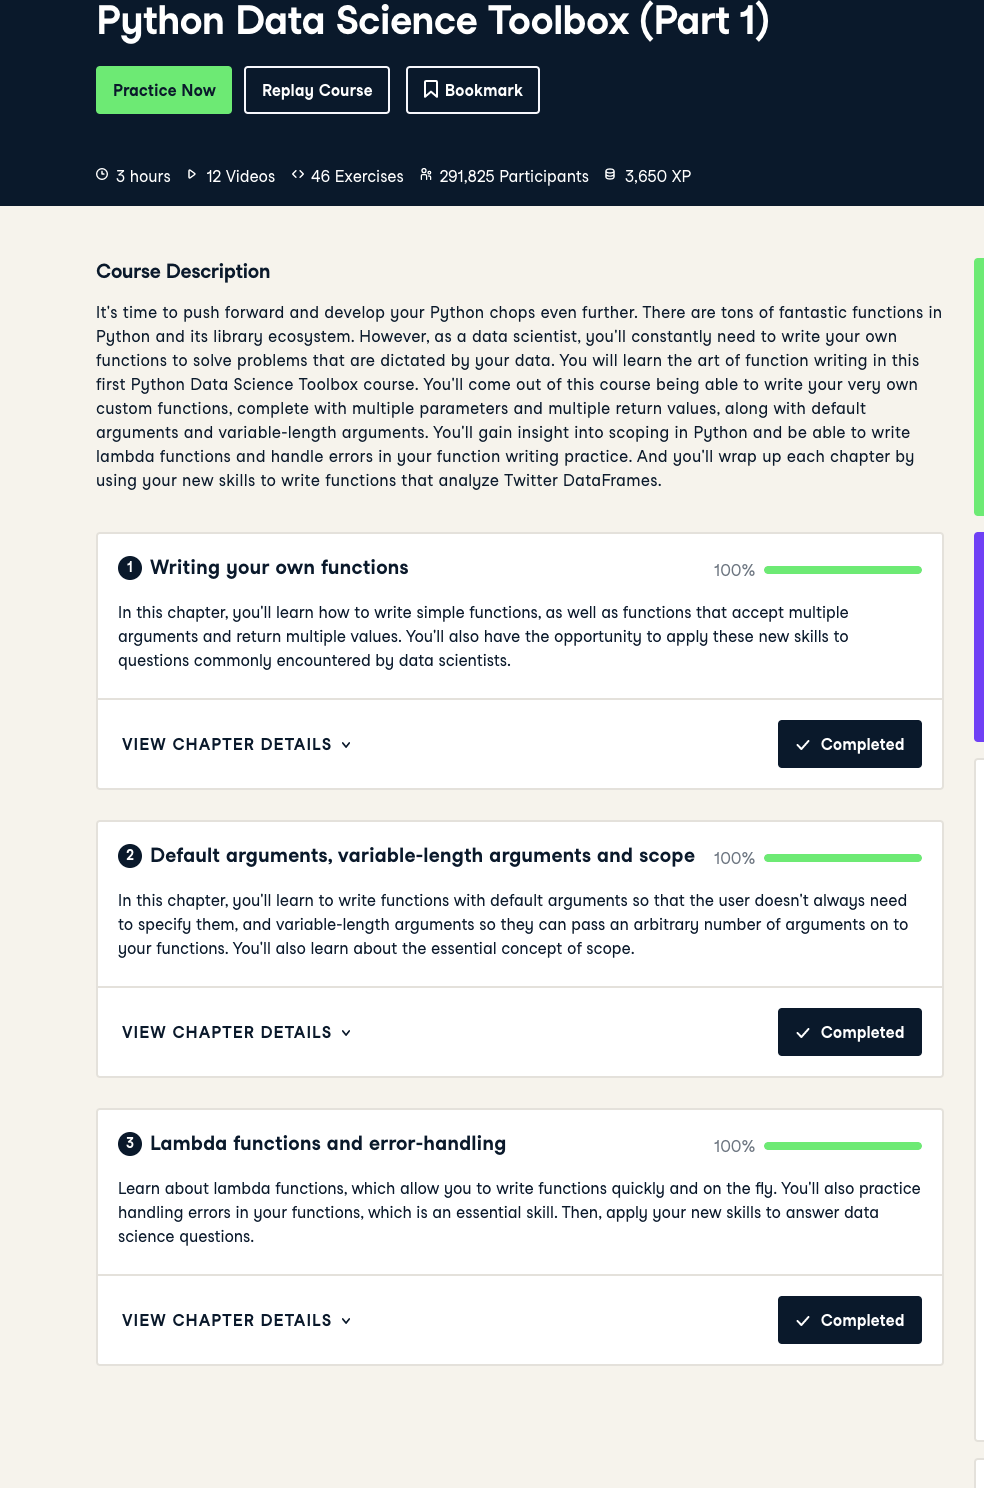